# Initialization

In [1]:
import matplotlib.pyplot as plt
import portfolio.portfolio as pf
import imp
imp.reload(pf)

<module 'portfolio.portfolio' from '/home/erik/Documents/script/portfolio/portfolio/portfolio.py'>

In [2]:
portfolio_json_path = r"../test/05_test_portfolio_performance/portfolio.json"

In [3]:
my_port = pf.Portfolio(portfolio_json_path)

# Plotting asset distribution

## Holdings per asset

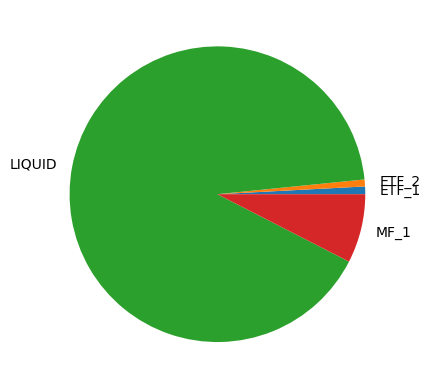

In [4]:
ah = my_port.asset_holdings
plt.pie(ah.value, labels=ah.asset_name)
plt.show()

## Holdings per account

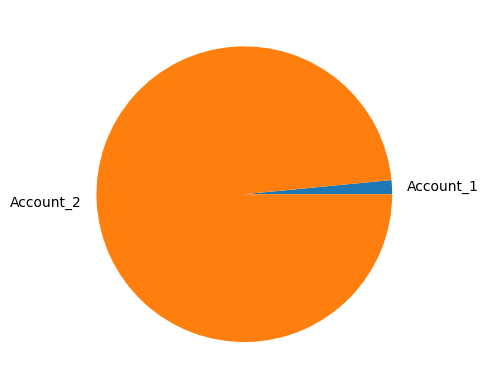

In [5]:
ach = my_port.account_holdings
plt.pie(ach.value, labels=ach.account_name)
plt.show()

## Distibution of risk

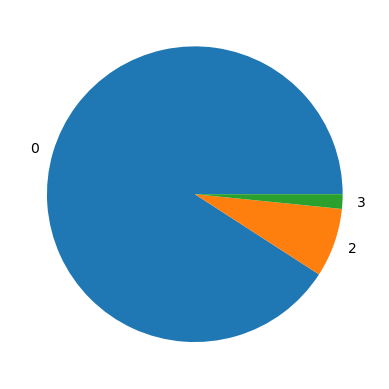

In [6]:
rp = my_port.collect_risk_class()
plt.pie(rp.value, labels=rp.risk_class)
plt.show()

## Distribution by country

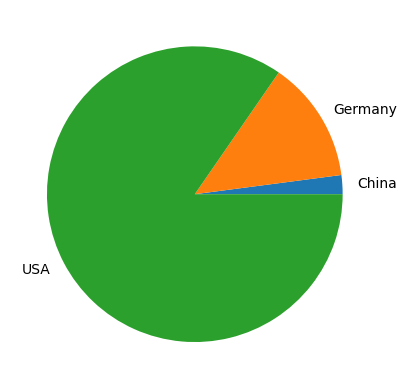

In [7]:
c = my_port.collect_country()
c = c[c.country != "unknown"]
plt.pie(c.value, labels=c.country)
plt.show()

# Plotting portfolio performance

Note: for simplicity, performance does not consider the individual transactions in the transaction statements. Costs of assets, e.g. for funds, are also not considered. Instead, the performance is estimated by using the current amount of money in each asset and considering the historic performance of each asset. This gives a rough estimation of the historic performance of the current portfolio. However, this is not valid in case of e.g. frequent movements and redistributions.

## Total performance

/home/erik/Documents/script/portfolio/portfolio/asset_performance.py:71: UserWarning: investing.com API: More than one result found, choosing first one.
Args: {'text': 'a14utf'}
Found: {"id_": 46003, "name": "BNP Paribas Easy Euro Stoxx 50 UCITS ETF EUR C/D", "symbol": "ETBB", "country": "germany", "tag": "/etfs/easyetf-euro-stoxx-50---a-share?cid=46003", "pair_type": "etfs", "exchange": "Xetra"}
  warnings.warn(f"investing.com API: More than one result found, choosing first one.\nArgs: {self._search_args}\nFound: {sr[0]}")
/home/erik/Documents/script/portfolio/portfolio/asset_performance.py:53: UserWarning: Asset performance not available. Assuming constant price of unity.
  warnings.warn("Asset performance not available. Assuming constant price of unity.")


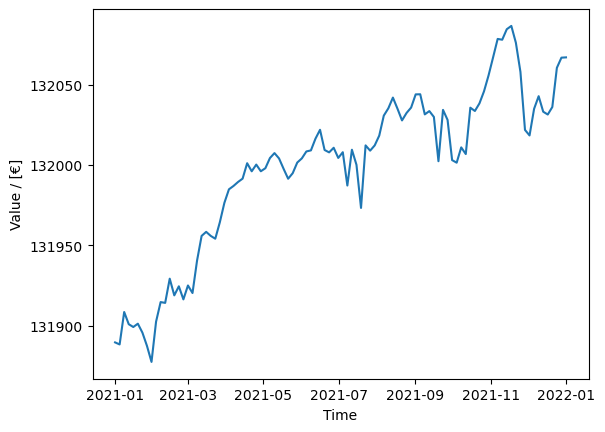

In [10]:
cp_d, cp_p = my_port.total_performance("2021-1-1","2022-1-1", 100) 
plt.plot(cp_d, cp_p)
plt.xlabel("Time")
plt.ylabel("Value / [€]")
plt.show()

## Individual asset performance

/home/erik/Documents/script/portfolio/portfolio/asset_performance.py:53: UserWarning: Asset performance not available. Assuming constant price of unity.
  warnings.warn("Asset performance not available. Assuming constant price of unity.")
/home/erik/Documents/script/portfolio/portfolio/asset_performance.py:71: UserWarning: investing.com API: More than one result found, choosing first one.
Args: {'text': 'a14utf'}
Found: {"id_": 46003, "name": "BNP Paribas Easy Euro Stoxx 50 UCITS ETF EUR C/D", "symbol": "ETBB", "country": "germany", "tag": "/etfs/easyetf-euro-stoxx-50---a-share?cid=46003", "pair_type": "etfs", "exchange": "Xetra"}
  warnings.warn(f"investing.com API: More than one result found, choosing first one.\nArgs: {self._search_args}\nFound: {sr[0]}")
/home/erik/Documents/script/portfolio/portfolio/asset_performance.py:53: UserWarning: Asset performance not available. Assuming constant price of unity.
  warnings.warn("Asset performance not available. Assuming constant price of u

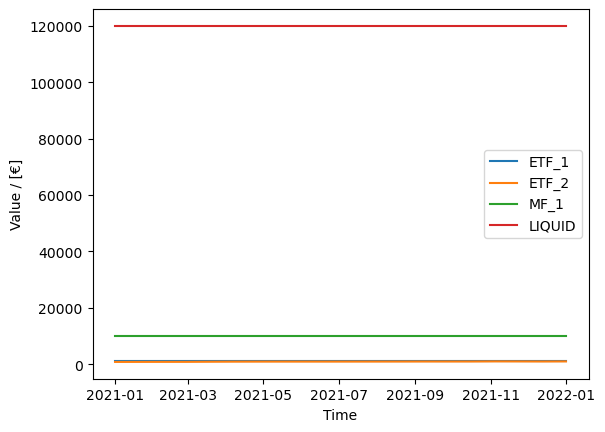

In [16]:
# absolute performance based on value in portfolio
perf = my_port.collect_performance("2021-1-1","2022-1-1", 20) 
for nm, (cp_d, cp_p) in perf.items():
    plt.plot(cp_d, cp_p, label=nm)
plt.xlabel("Time")
plt.ylabel("Value / [€]")
plt.legend()
plt.show()

/home/erik/Documents/script/portfolio/portfolio/asset_performance.py:53: UserWarning: Asset performance not available. Assuming constant price of unity.
  warnings.warn("Asset performance not available. Assuming constant price of unity.")
/home/erik/Documents/script/portfolio/portfolio/asset_performance.py:71: UserWarning: investing.com API: More than one result found, choosing first one.
Args: {'text': 'a14utf'}
Found: {"id_": 46003, "name": "BNP Paribas Easy Euro Stoxx 50 UCITS ETF EUR C/D", "symbol": "ETBB", "country": "germany", "tag": "/etfs/easyetf-euro-stoxx-50---a-share?cid=46003", "pair_type": "etfs", "exchange": "Xetra"}
  warnings.warn(f"investing.com API: More than one result found, choosing first one.\nArgs: {self._search_args}\nFound: {sr[0]}")
/home/erik/Documents/script/portfolio/portfolio/asset_performance.py:53: UserWarning: Asset performance not available. Assuming constant price of unity.
  warnings.warn("Asset performance not available. Assuming constant price of u

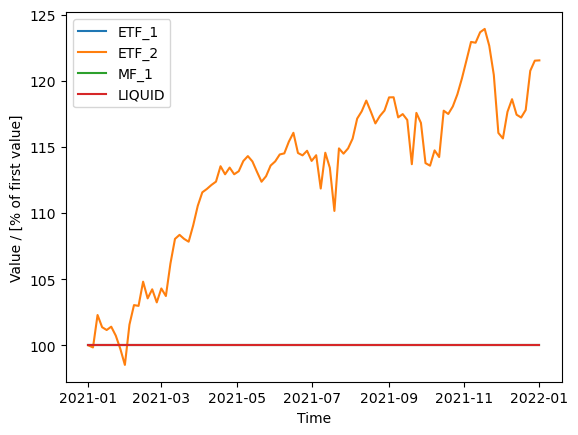

In [19]:
# relative performance 
perf = my_port.collect_performance("2021-1-1","2022-1-1", 100) 
for nm, (cp_d, cp_p) in perf.items():
    cp_p = cp_p/cp_p[0]*100
    plt.plot(cp_d, cp_p, label=nm)
plt.xlabel("Time")
plt.ylabel("Value / [% of first value]")
plt.legend()
plt.show()